# Titanic Classification

In [40]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('Titanic_Classification.csv')
df.shape

(891, 12)

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

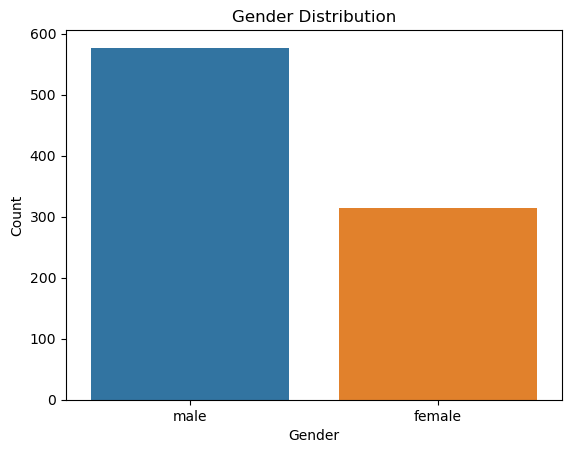

In [14]:
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

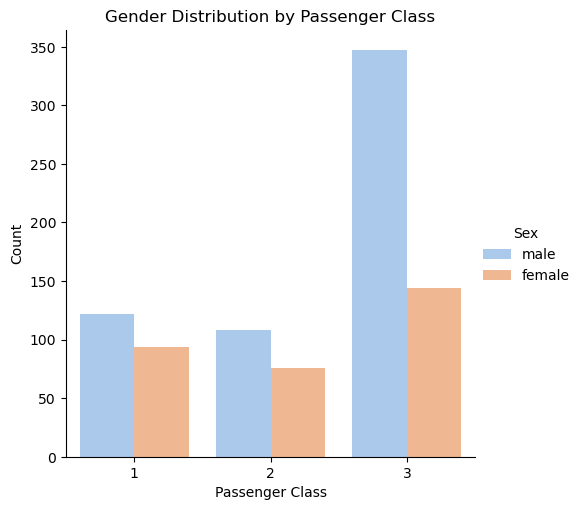

In [22]:
sns.catplot(x='Pclass', hue='Sex', data=df, kind='count', palette='pastel')

# Set the title and labels
plt.title('Gender Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# Show the plot
plt.show()

In [23]:
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

In [24]:
df['Person']= df[['Age','Sex']].apply(male_female_child, axis=1)

In [25]:
df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


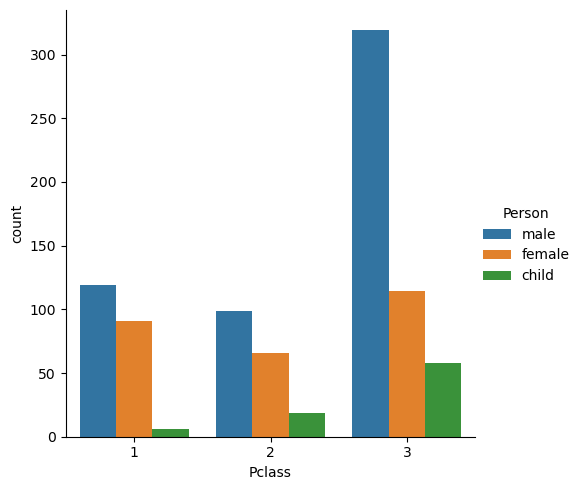

In [26]:
sns.catplot(x='Pclass', data=df, kind="count", hue='Person')

<Axes: >

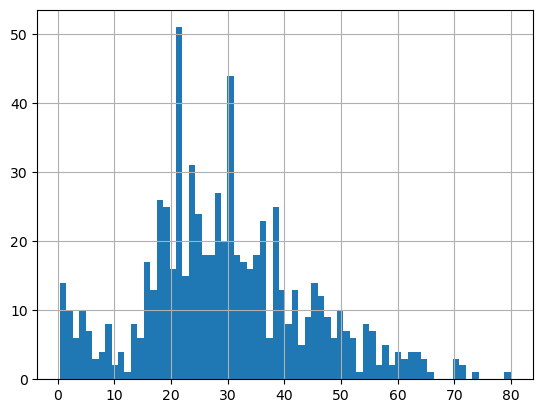

In [27]:
df['Age'].hist(bins=70)

In [28]:
df['Age'].mean()

29.69911764705882

In [29]:
df['Person'].value_counts()

Person
male      537
female    271
child      83
Name: count, dtype: int64

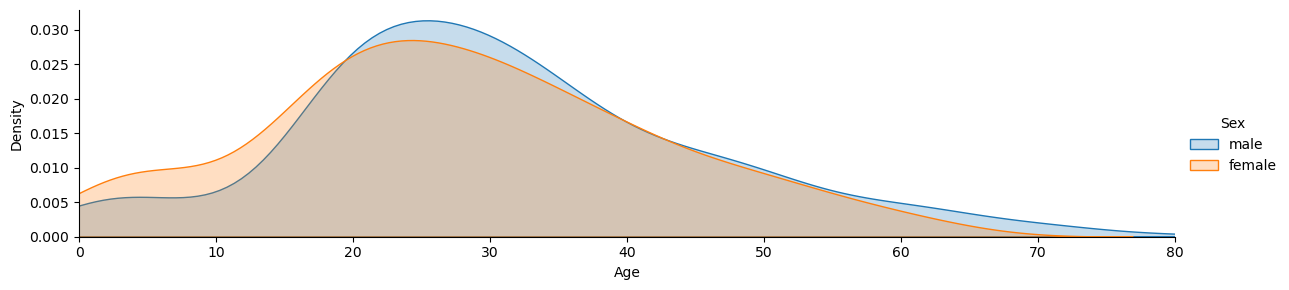

In [41]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert to numeric, coerce errors to NaN
df['Age'] = np.where(df['Age'] == np.inf, np.nan, df['Age'])  # Replace inf with NaN

# Create the FacetGrid plot
fig = sns.FacetGrid(df, hue="Sex", aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

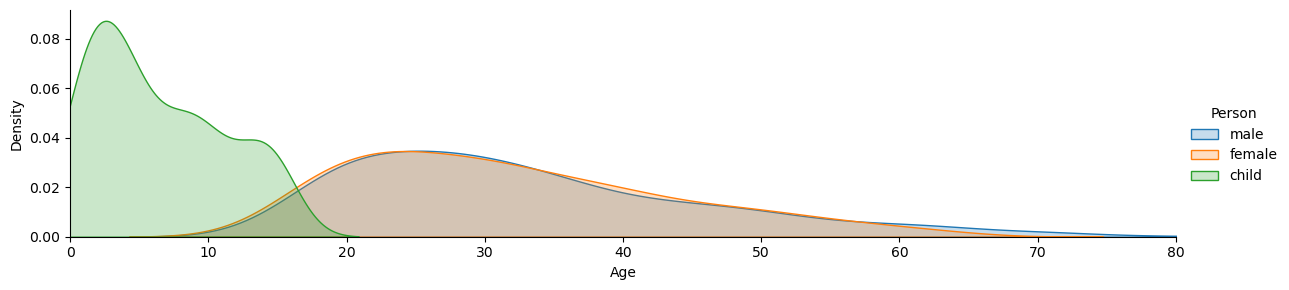

In [42]:
fig = sns.FacetGrid(df, hue='Person', aspect=4)

fig.map(sns.kdeplot, 'Age',fill=True)

oldest = df['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

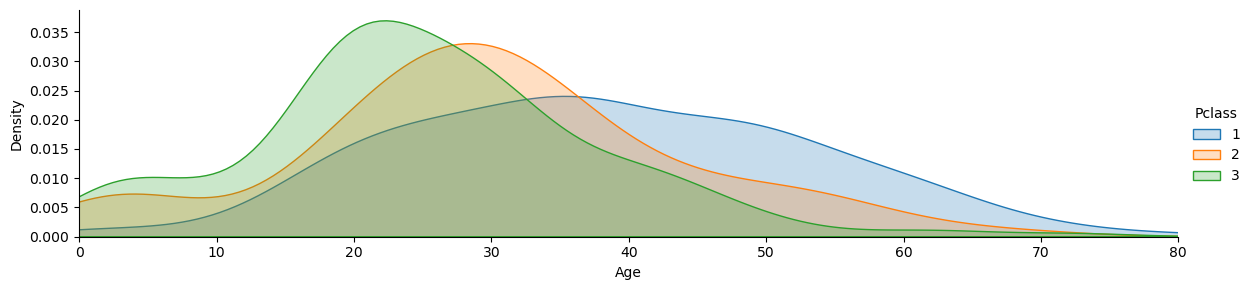

In [43]:
fig = sns.FacetGrid(df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot, 'Age',shade=True)

oldest = df['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

In [44]:
deck = df['Cabin'].dropna()

In [45]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

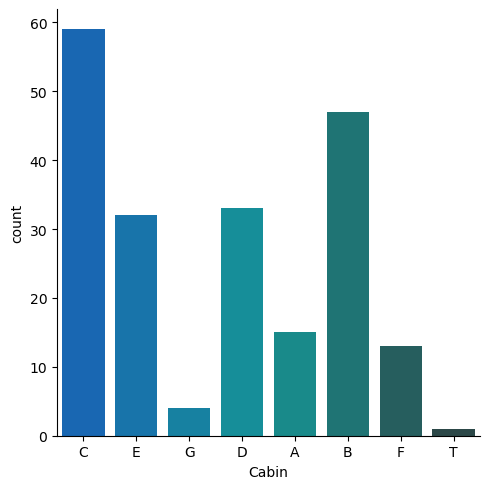

In [48]:
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.catplot(x='Cabin', data=cabin_df, palette='winter_d',kind='count')

<Axes: xlabel='Cabin', ylabel='count'>

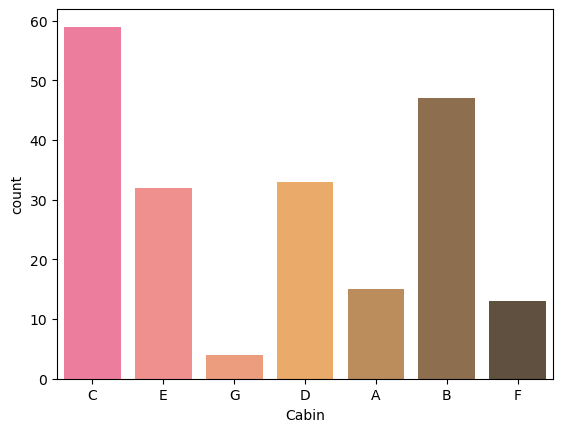

In [50]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.countplot(x='Cabin', data=cabin_df, palette='spring_d')

In [63]:
def update_alone(row):
    if row['Alone'] == 'Alone':
        return 'With Family'
    else:
        return 'Alone'

df['Alone'] = df.apply(update_alone, axis=1)

In [64]:
df['Alone']

0            Alone
1            Alone
2      With Family
3            Alone
4      With Family
          ...     
886    With Family
887    With Family
888          Alone
889    With Family
890    With Family
Name: Alone, Length: 891, dtype: object

<Axes: xlabel='Alone', ylabel='count'>

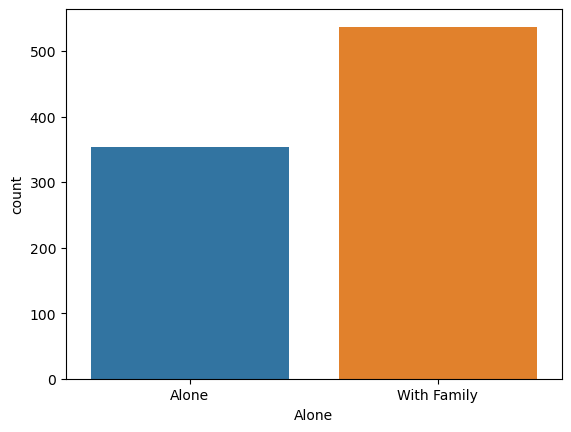

In [70]:
sns.countplot(x='Alone', data=df)

<Axes: xlabel='Survivor', ylabel='count'>

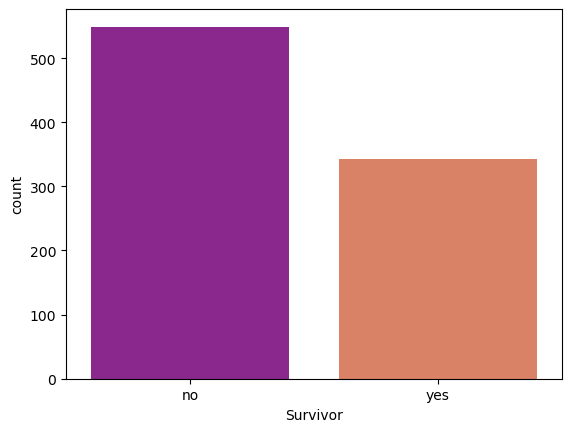

In [71]:
df['Survivor'] = df.Survived.map({0:'no', 1:'yes'})

# Let's just get a quick overall view of survied vs died. 
sns.countplot(x='Survivor', data=df, palette='plasma')

#### Conclsion:
Our complete analysis mainly covered three factors in this anlysis (Age, Sex, Pclass).

Age: Doesn't play much role in determining the survival chances, except for ages below 1 years.

Sex: Women had better chances of survival than men.

In general, Women & children across all classes had higer survival rates than men.

Pclass: Pclass-1 had best while Pclass-3 has the worst survival rate.

So we can say, that being a women in Pclass-1 seems to have the best chances of survival. However being a child or woman could not be considered as 100% survival chance.